In [10]:
import numpy as np
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import math
import cv2 as cv

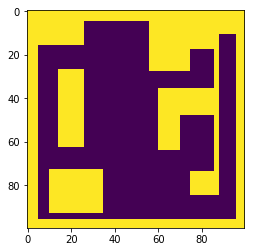

In [11]:
map = cv.imread("map_6.png", 0)

map = cv.bitwise_not(map)
map = map / 255
map *= 100
plt.imshow(map)
plt.show()

In [12]:
start_r = 5      # Needs to be any empty cell on the top wall
start_c = 30

In [13]:
def free_left():
    for i in range(100):
        for j in range(100):
            if map[i][j] == 0:
                return True
    return False
def print_map():
    for i in range(100):
        print(map[i])
def nextfree(r, c):
    for i in range(100):
        for j in range(100):
            if map[i][j] == 0:
                return i, j

In [14]:
from queue import PriorityQueue
import math
def index(r, c):
    return r * 100 + c
def distance(r, c, rr, cc):
    return math.sqrt((r - rr)**2 + (c-cc)**2)

def dijkstra(source_r, source_c, dest_r, dest_c):
    dist = np.zeros((100, 100))
    
    prev = np.ones((100, 100))
    visited = np.zeros((100, 100)) # 1 blocked/visited
    pq = PriorityQueue() 

    for i in range(100):
        for j in range(100):
            if map[i][j] == 100:
                visited[i][j] = 1
            else:
                visited[i][j] = 0
            prev[i][j] = 99999999
            dist[i][j] = 10000000
    node = [0.0, index(source_r, source_c)]
    pq.put(node)
    while not pq.empty():
        temp = pq.get()
        #print(temp)
        ind = temp[1]
        r = ind // 100
        c = ind - r * 100
        dr = [1, -1, 0, 0, 1, 1, -1, -1]
        dc = [0, 0, 1, -1, 1, -1, 1, -1]
        for i in range(8):
            rr = r + dr[i]
            cc = c + dc[i]
            
            if cc < 0 or rr < 0 or rr > 99 or cc > 99 or map[rr][cc] == 100:
                continue
            else:
                if i <= 3:
                    alt = temp[0] + 1
                else:
                    alt = temp[0] + 1.414
            if alt < dist[rr][cc]:
                visited[rr][cc] = 1
                dist[rr][cc] = alt
                prev[rr][cc] = index(r, c)
                pq.put([alt, index(rr, cc)])
            if visited[dest_r][dest_c] == 1:
                break
        if visited[dest_r][dest_c] == 1:
            break
    map[dest_r][dest_c] = 90
    r = dest_r
    c = dest_c
    #print(prev)
    while(True):
        #print("really")
        next = prev[r][c]
        #print(next)
        r = int(next // 100)
        c = int(next - r * 100)
        map[r][c] = 90
        #plt.imshow(map)
        #plt.show()
        #time.sleep(0.25)
        #clear_output()
        
        if map[source_r][source_c] == 90:
            break
# changed 50 to 75

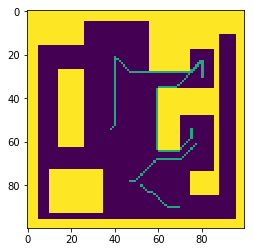

In [16]:
current_r = start_r
current_c = start_c
prev_r = 0
prev_c = 0
dir = 'd'
count = 0
# d = right s = down a = left w = up
while(free_left()):
    if dir == 'd':
        if map[current_r-1][current_c] >= 75:
            map[current_r][current_c] = 75
            prev_r = current_r
            prev_c = current_c
            current_c += 1
        if map[current_r][current_c] >= 75:
            current_c -= 1
            dir = 's'
        if not map[current_r-1][current_c] >= 75:
            dir = 's'
    if dir == 's':
        if map[current_r][current_c+1] >= 75:
            map[current_r][current_c] = 75
            prev_r = current_r
            prev_c = current_c
            current_r += 1
        if map[current_r][current_c] >= 75:
            current_r -= 1
            dir = 'a'
        if not map[current_r][current_c+1] >= 75:
            dir = 'a'
    if dir == 'a':
        if map[current_r+1][current_c] >= 75:
            map[current_r][current_c] = 75
            prev_r = current_r
            prev_c = current_c
            current_c -= 1
        if map[current_r][current_c] >= 75:
            current_c += 1
            dir = 'w'
        if not map[current_r+1][current_c] >= 75:
            dir = 'w'
    if dir == 'w':
        if map[current_r][current_c-1] >= 75:
            map[current_r][current_c] = 75
            prev_r = current_r
            prev_c = current_c
            current_r -= 1
        if map[current_r][current_c] >= 75:
            current_r += 1
            dir = 'd'
        if not map[current_r][current_c-1] >= 75:
            dir = 'd'
    if map[current_r-1][current_c] >= 75 and map[current_r][current_c+1] >= 75 and map[current_r+1][current_c] >= 75 and map[current_r][current_c-1] >= 75:
        map[current_r][current_c] = 75
        if(free_left() == False):
            break
        next_r, next_c = nextfree(current_r, current_c)
        
        dijkstra(next_r, next_c, current_r, current_c)
        current_r = next_r
        current_c = next_c
    
        
    ### Uncomment these time to get a cool animation of the traversal
    #plt.imshow(map)
    #plt.show()
    #time.sleep(0.25)
    #clear_output()

plt.imshow(map)
plt.show()